In [34]:
import pandas as pd
import numpy as np
from numpy.random import randint 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

display_setting = {'max_columns':100,
                  'expand_frame_repr':True,
                  'max_rows':100,
                  'precision':2,
                  'show_dimensions':True}

for op,value in display_setting.items():
    pd.set_option('display.{}'.format(op),value)

%matplotlib inline

In [35]:
stack = pd.read_csv('surveyResult2019.csv')

In [36]:
stack.shape

(88883, 85)

In [37]:
stack.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [38]:
stack.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [39]:
# callutating total sum of NAN
stack.isna().sum().sum()

1028850

In [40]:
# Droping some column that might not be relevant for the analysis
stack.drop(columns=['Respondent','Hobbyist','Student','EdLevel','UndergradMajor','EduOther','OrgSize','DevType','YearsCode',
                    'Age1stCode','YearsCodePro','MgrIdiot','MgrMoney',
                    'MgrWant','JobSeek','LastHireDate','LastInt','FizzBuzz','JobFactors','CurrencySymbol','CurrencyDesc',
                    'CompTotal','CompFreq','WorkPlan','WorkChallenge','WorkRemote','ImpSyn','CodeRev','CodeRevHrs','UnitTests',
                    'PurchaseHow','PurchaseWhat','MiscTechWorkedWith','MiscTechDesireNextYear','DevEnviron','Containers',
                    'BlockchainOrg','BlockchainIs','BetterLife','ITperson','OffOn','Extraversion','ScreenName','SOVisit1st',
                    'SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq',
                    'SOJobs','EntTeams','SOComm','WelcomeChange','OpenSource','SONewContent','Trans',
                    'Sexuality','Ethnicity','Dependents','SurveyLength','SurveyEase'],inplace=True)

In [41]:
stack.head(5)

,MainBranch,OpenSourcer,Employment,Country,CareerSat,JobSat,ResumeUpdate,ConvertedComp,WorkWeekHrs,WorkLoc,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,OpSys,SocialMedia,Age,Gender
0,I am a student who is learning to code,Never,"Not employed, and not looking for work",United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Windows,Twitter,14.0,Man
1,I am a student who is learning to code,Less than once per year,"Not employed, but looking for work",Bosnia and Herzegovina,NaN,NaN,"Something else changed (education, award, medi...",NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,Windows,Instagram,19.0,Man
2,"I am not primarily a developer, but I write co...",Never,Employed full-time,Thailand,Slightly satisfied,Slightly satisfied,I was preparing for a job search,8820.0,40.0,Home,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,Linux-based,Reddit,28.0,Man
3,I am a developer by profession,Never,Employed full-time,United States,Very satisfied,Slightly satisfied,I was preparing for a job search,61000.0,80.0,Home,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Windows,Reddit,22.0,Man
4,I am a developer by profession,Once a month or more often,Employed full-time,Ukraine,Very dissatisfied,Slightly dissatisfied,I was preparing for a job search,NaN,55.0,Office,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Linux-based,Facebook,30.0,Man


In [42]:
# filling of numerical columns with (NAN) with their median Values
stack.fillna(stack.median(),inplace=True)

In [43]:
stack.isna().sum()

MainBranch                  552
OpenSourcer                   0
Employment                 1702
Country                     132
CareerSat                 16036
JobSat                    17895
ResumeUpdate              11006
ConvertedComp                 0
WorkWeekHrs                   0
WorkLoc                   18828
LanguageWorkedWith         1314
LanguageDesireNextYear     4795
DatabaseWorkedWith        12857
DatabaseDesireNextYear    19736
PlatformWorkedWith         8169
PlatformDesireNextYear    11440
WebFrameWorkedWith        23861
WebFrameDesireNextYear    25939
OpSys                      1032
SocialMedia                4446
Age                           0
Gender                     3477
Length: 22, dtype: int64

In [44]:
# Manipulating the MainBranch colunmns and converting of MainBranch and ResumeUpdate columns to category Type
MainBranch = []

for i in stack['MainBranch']:
    if i == 'I am adeveloper by profession':
        MainBranch.append('Developer')
    elif i == 'I am a student who is learning to code':
        MainBranch.append('Student')
    elif i == 'I am not primarily a developer, but I write code sometimes as part of my work':
        MainBranch.append('SemiDeveloper')
    elif i == 'I code primarily as a hobby':
        MainBranch.append('Hobby')
    else:
        MainBranch.append('ExDeveloper')
        
stack.MainBranch = MainBranch
stack['MainBranch'] = stack.MainBranch.astype('category')
stack.ResumeUpdate = stack.ResumeUpdate.astype('category')


In [45]:
stack.Employment.value_counts().index

Index(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'Employed part-time',
       'Not employed, and not looking for work', 'Retired'],
      dtype='object')

In [46]:
# Manipulating the Employment colunmns and converting it to category Type
Employment = []
for i in stack.Employment:
    if i == 'Employed full-time':
        Employment.append('Fulltime')
    elif i == 'Independent contractor, freelancer, or self-employed':
        Employment.append('Freelancer')
    elif i == 'Not employed, but looking for work':
        Employment.append('Unemployed')
    elif i == 'Employed part-time':
        Employment.append('PartTime')
    elif i == 'Not employed, and not looking for work':
        Employment.append('Neutral')
    else:
        Employment.append('Retired')
stack.Employment = Employment
stack.Employment = stack.Employment.astype('category')

In [47]:
# Manipulating the OpenSourcer colunmns into Boolean Features
OpenSourcer = []
for i in stack.OpenSourcer:
    if i == 'Never':
        OpenSourcer.append(False)
    else:
        OpenSourcer.append(True)
stack.OpenSourcer = OpenSourcer


In [48]:
# Manipulating the JobSat colunmns and converting it to category Type
JobSat = []
for i in stack.JobSat:
    if i == 'Neither satisfied nor dissatisfied':
        JobSat.append('Neutral')
    else:
        JobSat.append(i)
stack.JobSat = JobSat     
stack.JobSat = stack.JobSat.astype('category')

In [49]:
# Manipulating the WorkLoc colunmns and converting of WorkLoc,OpSys and Age columns to category and int64 type
workLoc = []
for i in stack.WorkLoc:
    if i == 'Other place, such as a coworking space or cafe':
        workLoc.append('Other')
    else:
        workLoc.append(i)
stack.WorkLoc = workLoc
stack.WorkLoc = stack.WorkLoc.astype('category')
stack.OpSys = stack.OpSys.astype('category')
stack.Age = stack.Age.astype('int64')

In [50]:
stack.head(5)

,MainBranch,OpenSourcer,Employment,Country,CareerSat,JobSat,ResumeUpdate,ConvertedComp,WorkWeekHrs,WorkLoc,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,OpSys,SocialMedia,Age,Gender
0,Student,False,Neutral,United Kingdom,NaN,NaN,NaN,57287.0,40.0,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Windows,Twitter,14,Man
1,Student,True,Unemployed,Bosnia and Herzegovina,NaN,NaN,"Something else changed (education, award, medi...",57287.0,40.0,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,Windows,Instagram,19,Man
2,SemiDeveloper,False,Fulltime,Thailand,Slightly satisfied,Slightly satisfied,I was preparing for a job search,8820.0,40.0,Home,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,Linux-based,Reddit,28,Man
3,ExDeveloper,False,Fulltime,United States,Very satisfied,Slightly satisfied,I was preparing for a job search,61000.0,80.0,Home,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Windows,Reddit,22,Man
4,ExDeveloper,True,Fulltime,Ukraine,Very dissatisfied,Slightly dissatisfied,I was preparing for a job search,57287.0,55.0,Office,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Linux-based,Facebook,30,Man


In [51]:
stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   MainBranch              88883 non-null  category
 1   OpenSourcer             88883 non-null  bool    
 2   Employment              88883 non-null  category
 3   Country                 88751 non-null  object  
 4   CareerSat               72847 non-null  object  
 5   JobSat                  70988 non-null  category
 6   ResumeUpdate            77877 non-null  category
 7   ConvertedComp           88883 non-null  float64 
 8   WorkWeekHrs             88883 non-null  float64 
 9   WorkLoc                 70055 non-null  category
 10  LanguageWorkedWith      87569 non-null  object  
 11  LanguageDesireNextYear  84088 non-null  object  
 12  DatabaseWorkedWith      76026 non-null  object  
 13  DatabaseDesireNextYear  69147 non-null  object  
 14  PlatformWorkedWith    

In [52]:
dev = stack.groupby('JobSat')['OpenSourcer'].value_counts()
dev = dev.to_frame('NumberOfDevelopers')
dev = dev.reset_index()

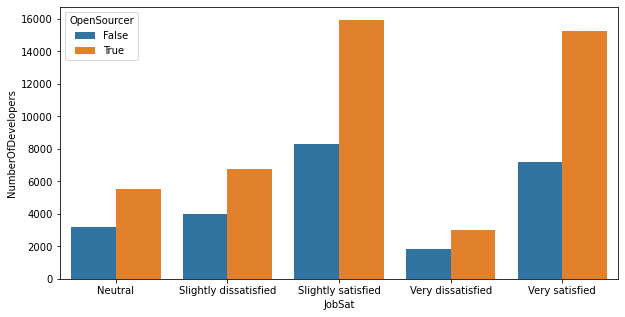

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x='JobSat',y='NumberOfDevelopers',hue='OpenSourcer',data=dev)

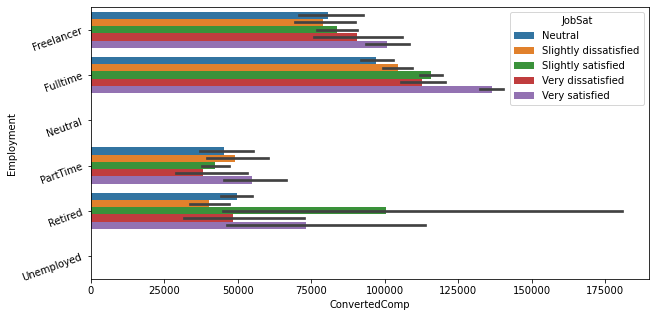

In [54]:
plt.figure(figsize=(10,5))
plt.yticks(rotation=20)
sns.barplot(x=stack.ConvertedComp,y=stack.Employment,hue=stack.JobSat)

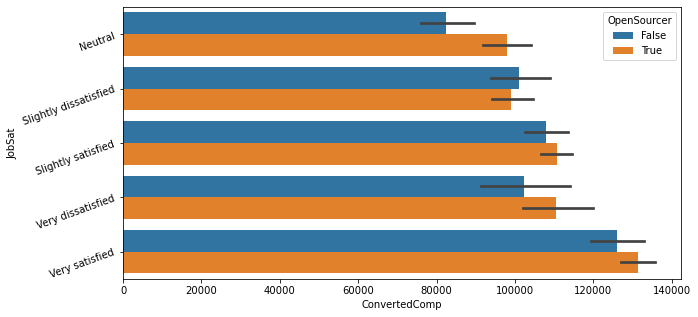

In [55]:
plt.figure(figsize=(10,5))
plt.yticks(rotation=20)
sns.barplot(x=stack.ConvertedComp,y=stack.JobSat,hue=stack.OpenSourcer)

In [56]:
# grouping by Country correspinding with the ConvertedComp columns with loc[30] and also determining the average income 
num = stack['Country'].value_counts()[:30]
total = stack.groupby('Country')['ConvertedComp'].sum()
data = (total/num).sort_values(ascending=False)[:30]
data1 = data.reset_index()
data1.columns = ['CountryName','AverageIncome']

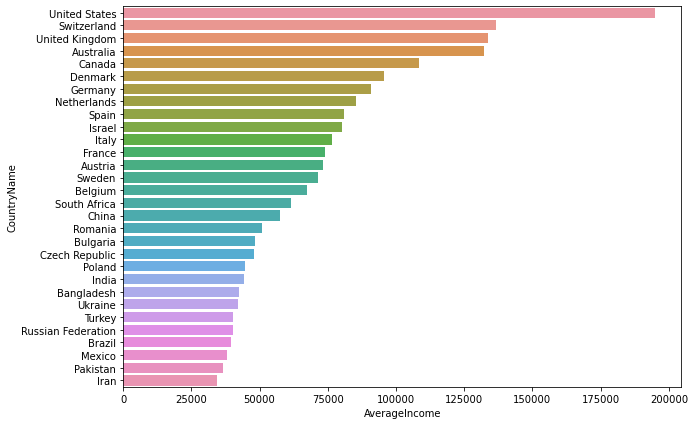

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(x='AverageIncome',y='CountryName',data=data1)

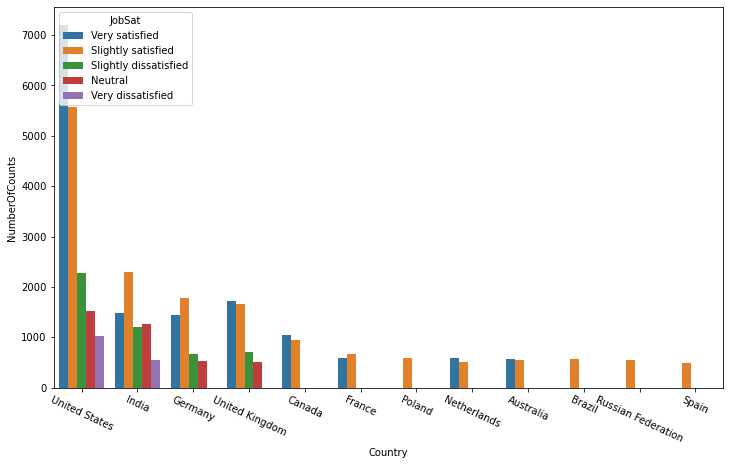

In [58]:
satisfy = stack.groupby('Country')['JobSat'].value_counts().sort_values(ascending=False)[:30]
satisfy1 = satisfy.to_frame('NumberOfCounts')
satisfy2 = satisfy1.reset_index()
plt.figure(figsize=(12,7))
plt.xticks(rotation=-25)
sns.barplot(x='Country',y='NumberOfCounts',data=satisfy2,hue='JobSat')

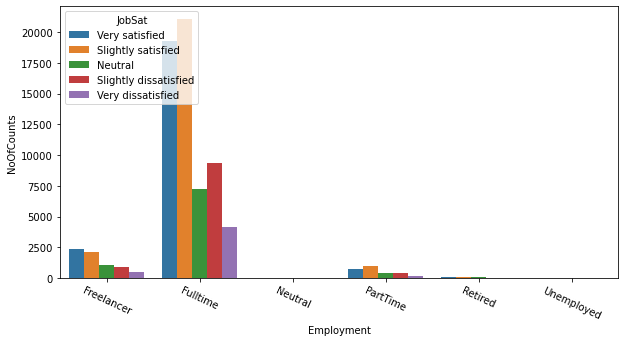

In [59]:
employ = stack.groupby('Employment')['JobSat'].value_counts()
employ2 = employ.to_frame('NoOfCounts').reset_index()
plt.figure(figsize=(10,5))
plt.xticks(rotation=-25)
sns.barplot(x='Employment',y='NoOfCounts',hue='JobSat',data=employ2)

##### Brief Memo Notes

Based on the information on the above data, it's highly recommended to newer/younger developer pursuing/evaluating career opportunities in the future that...

(1) If overall hapiness is their goal.. Therefore they should consider being a Full-time worker and if not they should cansider themselves as a freelancer of Full-time worker...


(2) If higher salary is their goal.. Therefore they should consider being a Full-time worker and also move to location such 
as United-States, Switzerland od United-kingdom...

(3) However for the higher salary and job-Satisfaction criteria, they should however been an OpenSourcer, based on the above information from the dataSet graph..

